# 4.10 Coding Etiquette and Excel Reporting (Part 2)

## Table of Contents

- Importing libraries and files

- Creating customer 'profile' for targeted marketing purposes

- Customer profile comparison in regions and departments.

- Visualizing 'profile' distribution

- Aggregate the Max, Min & Mean Values

- Compare And identify customer profiles with regions and departments (Please continue check Part 3 due to sluggish)

## Importing libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path
path = r'/Users/rusamijan/03-2023 Instacart Basket Analysis'

In [3]:
# import high_activity data set
df_high_act_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [4]:
#import departments data set 
df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [5]:
# check column name and number of columns
df_high_act_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_of_registration,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


In [6]:
df_high_act_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [7]:
# Check department data set
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Change the column name from Unnamed: 0 to department_id
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

## Customer profiling

*The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

What are demographics are we going to be looking at?
 - Age
 - Income
 - Martial status and Number dependants 

#### - Age

In [9]:
# Exploring descriptive statistics of 'age' column
df_high_act_cust['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Result: The minimum age is 18 and the maximum is 81 and the rest is adult or Middle aged
Grouping age groups

Youth: 18 - 39
Middle Aged: 40 - 64
Senior: 65+

In [10]:
#creating age categories
df_high_act_cust.loc[(df_high_act_cust['age'] >= 18) & (df_high_act_cust['age'] < 40), 'age_category'] = 'Youth'
df_high_act_cust.loc[(df_high_act_cust['age'] >= 40) & (df_high_act_cust['age'] < 65), 'age_category'] = 'Middle Aged'
df_high_act_cust.loc[df_high_act_cust['age'] >= 65, 'age_category'] = 'Senior'

In [11]:
# Checking age_category values
df_high_act_cust['age_category'].value_counts()

Middle Aged    12103910
Youth          10665110
Senior          8195544
Name: age_category, dtype: int64

In [12]:
# Confirming the added column
df_high_act_cust.shape

(30964564, 34)

In [13]:
# Customer comparison by age & day of week
crosstab_age_day = pd.crosstab(df_high_act_cust['age_category'], df_high_act_cust['orders_day_of_week'], dropna = False)

Text(0.5, 0, 'Ages Group')

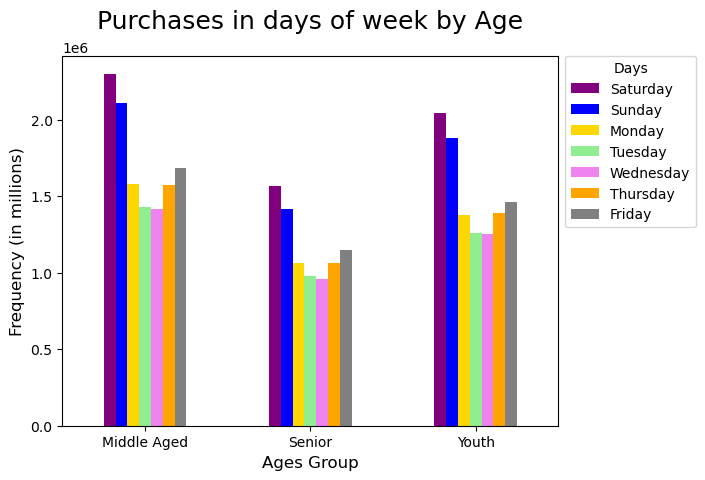

In [90]:
# Visualization of crosstab_age_day
bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['purple', 'blue', 'gold', 'lightgreen', 'violet','orange', 'gray'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Ages Group',  fontsize = 12)

Across all 3 Age Groups of Seniors, Middle-Aged & Youth

Busiest Day = Saturday

Slowest Day = Wednesday

In [15]:
# Export bar chart by age group
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_age_day_of_week_03.16.png'))

In [16]:
# create busiest_of_days_03
busiest_of_days_03 = []

for value in df_high_act_cust["order_hour_of_day"]:
  if value in [10,11,14,15,13,12,16,9]:
    busiest_of_days_03.append("Stardard hours")
  elif value in [23,6,0,1,5,2,4,3]:
    busiest_of_days_03.append("Early bird")
  else:
    busiest_of_days_03.append("Night owl")

In [17]:
df_high_act_cust['busiest_of_days_for_chart']= busiest_of_days_03

In [18]:
# Customer comparison by region & order hour of day 
crosstab_age_hour = pd.crosstab(df_high_act_cust['age_category'], df_high_act_cust['busiest_of_days_for_chart'], dropna = False)

Text(0.5, 0, 'Age Group')

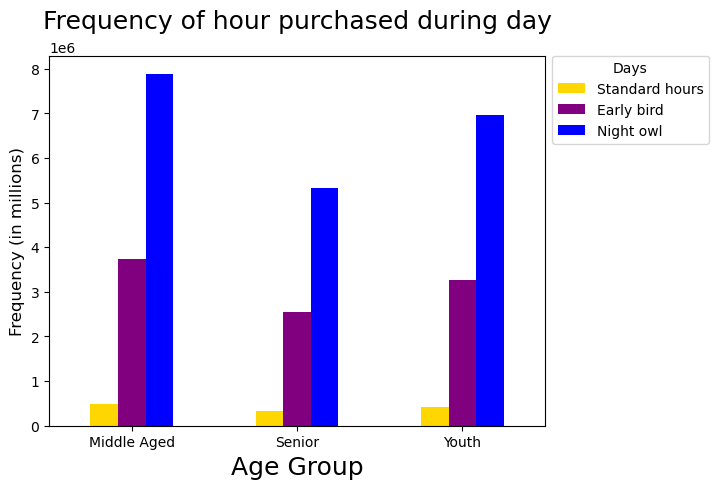

In [19]:
# Visualization of crosstab_age_day
bar_age_day = crosstab_age_hour.plot(kind = 'bar', rot = 0, color= ['gold', 'purple', 'blue'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

#### - Income

In [20]:
# # Exploring descriptive statistics of 'income' column
df_high_act_cust['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

Result: Lowest Income = 25,900 and The Highest is 593,901 USD 
Grouping Customers by income

Low = <70,000
Middle-class = 70,000-100,000
Upper-middle-class = 100,000-130,000
High = >130,000

In [21]:
# Creating income_category columns
df_high_act_cust.loc[df_high_act_cust['income']< 70000, 'income_category'] = 'Low'
df_high_act_cust.loc[(df_high_act_cust['income']>= 70000) & (df_high_act_cust['income']< 100000), 'income_category'] = 'Middle-class'
df_high_act_cust.loc[(df_high_act_cust['income']>= 100000) & (df_high_act_cust['income']< 130000), 'income_category'] = 'Upper-mid-class'
df_high_act_cust.loc[df_high_act_cust['income']>= 130000, 'income_category'] = 'High'

In [22]:
# Checking income_category values
df_high_act_cust['income_category'].value_counts(dropna = False)

Low                8520533
Middle-class       8236629
High               7401414
Upper-mid-class    6805988
Name: income_category, dtype: int64

In [23]:
# Confirming the added column
df_high_act_cust.shape

(30964564, 36)

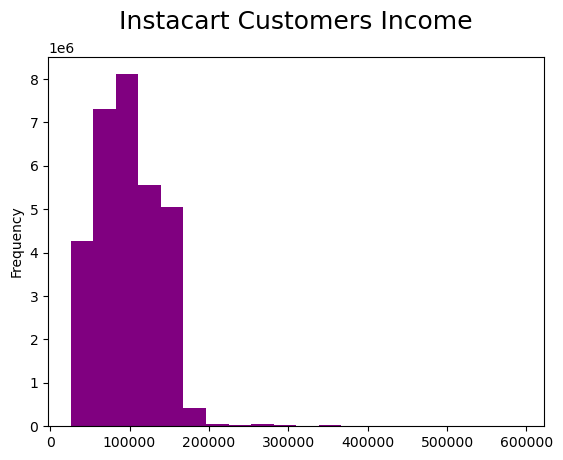

In [24]:
# Create an income histogram
plt.title('Instacart Customers Income', fontsize = 18, pad=20)
hist_inc = df_high_act_cust['income'].plot.hist(bins = 20, color = 'purple')

In [25]:
# Export histogram chart
hist_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram_03.16.png'))

#### - Martial status and Number of dependants

In [26]:
# Exploring 'number_of_dependents'
df_high_act_cust['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

Result: Min = 0 and  Max = 3 (dependents per family)

Grouping families by size
Small = 0
Middle Sized = 1-2
Large = 3

In [27]:
# Creating family_size column
df_high_act_cust.loc[df_high_act_cust['number_dependants'] == 0, 'family_size'] = 'Small'
df_high_act_cust.loc[(df_high_act_cust['number_dependants'] == 1) | (df_high_act_cust['number_dependants'] == 2), 'family_size'] = 'Mid sized'
df_high_act_cust.loc[df_high_act_cust['number_dependants'] > 2, 'family_size'] = 'Large'

In [28]:
df_high_act_cust['family_size'].value_counts(dropna = False)

Mid sized    15452367
Large         7772516
Small         7739681
Name: family_size, dtype: int64

In [29]:
# Exploring the connection of 'marital_status' and 'no_of_dependents'
family_crosstab = pd.crosstab(df_high_act_cust['marital_status'],df_high_act_cust['number_dependants'],dropna = False)

In [30]:
family_crosstab

number_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [31]:
df_high_act_cust.loc[(df_high_act_cust['marital_status'] == 'married') & (df_high_act_cust['number_dependants'] == 1), 'household'] = 'Couple Without Children'
df_high_act_cust.loc[(df_high_act_cust['marital_status'] == 'married') & (df_high_act_cust['number_dependants'] >= 2), 'household'] = 'Couple With Children'
df_high_act_cust.loc[(df_high_act_cust['marital_status'] == 'divorced/widowed') | (df_high_act_cust['marital_status'] == 'single'), 'household'] = 'Single Person'
df_high_act_cust.loc[(df_high_act_cust['marital_status'] == 'divorced/widowed') & (df_high_act_cust['number_dependants'] > 0 ), 'household'] = 'Single Parent'
df_high_act_cust.loc[df_high_act_cust['marital_status'] == 'living with parents and siblings', 'household'] = 'Other Family'

In [32]:
# Checking new column (household)
df_high_act_cust['household'].value_counts(dropna = False)

Couple With Children       14532650
Single Person               7739681
Couple Without Children     7211061
Other Family                1481172
Name: household, dtype: int64

In [33]:
# Confirming added column
df_high_act_cust.shape

(30964564, 38)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple With Children'),
  Text(1, 0, 'Single Person'),
  Text(2, 0, 'Couple Without Children'),
  Text(3, 0, 'Other Family')])

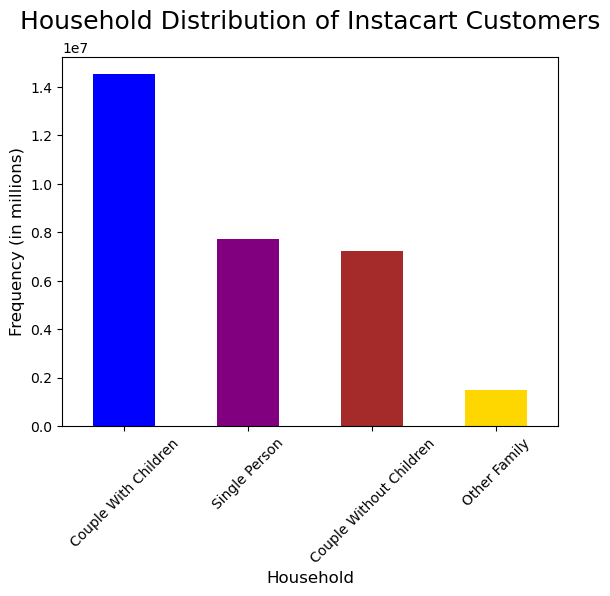

In [34]:
bar_household = df_high_act_cust['household'].value_counts().plot.bar(color= ['blue', 'purple', 'brown', 'gold'])
plt.title('Household Distribution of Instacart Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

In [35]:
# Export the bar chart
bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_houshold_stats_barchart_03_16.png'))

## Customer profile comparison in regions and departments.

In [36]:
# Create dictionary 
depts_map = dict(zip(df_depts["department_id"], df_depts["department"]))

In [37]:
depts_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [38]:
df_high_act_cust['department'] = df_high_act_cust['department_id'].map(depts_map)

In [39]:
df_high_act_cust.shape

(30964564, 39)

In [40]:
# Distribution of 'department' values in 'df_high_act_cust' dataframe
df_high_act_cust['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Behavioral Market Segmentation: 

In [41]:
# Creating alcohol_drinker column
df_high_act_cust.loc[df_high_act_cust['department'] !='alcohol', 'alcohol_drinker'] = 'No'
df_high_act_cust.loc[df_high_act_cust['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [42]:
df_high_act_cust['alcohol_drinker'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

Text(0.5, 1.0, 'Distribution of alcohol-drinkers ')

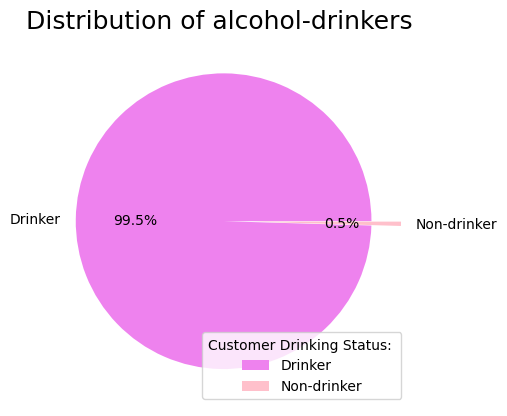

In [43]:
# Drawing a pie chart for alcohol drinking profiling

alcohol_drinker_pie = df_high_act_cust['alcohol_drinker'].value_counts().plot.pie(labels = ['Drinker','Non-drinker'], autopct=('%.1f%%'), colors = ['violet', 'pink'], label = '', explode = [0,0.2])
alcohol_drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Distribution of alcohol-drinkers ", fontsize = '18')

In [44]:
# Create Families with Babies
df_high_act_cust.loc[df_high_act_cust['department'] == 'babies','Has_babies'] = 'Yes'
df_high_act_cust.loc[df_high_act_cust['department'] != 'babies','Has_babies'] = 'No'

In [45]:
df_high_act_cust['Has_babies'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: Has_babies, dtype: int64

In [46]:
df_high_act_cust.shape

(30964564, 41)

In [47]:
# Create Stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (df_high_act_cust['region'],df_high_act_cust['income_category'], dropna = False)

In [48]:
crosstab_income_region

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


In [49]:
crosstab_baby_region = pd.crosstab(df_high_act_cust['region'], df_high_act_cust['Has_babies'], dropna = False)

In [50]:
crosstab_baby_region

Has_babies,No,Yes
region,,
Midwest,7165772,95741
Northeast,5391973,72712
South,10171628,139511
West,7824799,102428


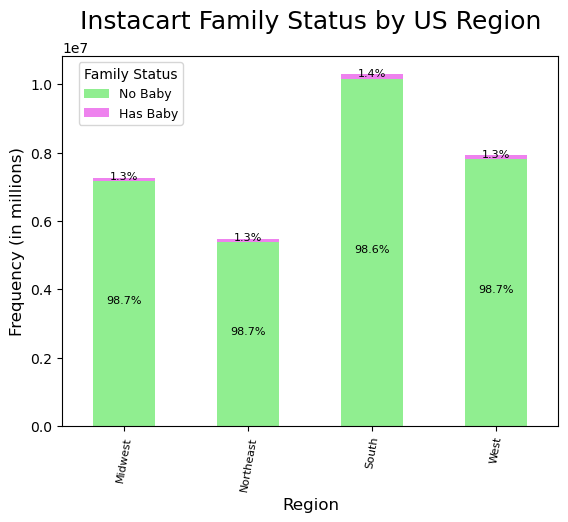

In [51]:
bar_baby_region = crosstab_baby_region.plot(kind = 'bar', stacked = True, color= ['lightgreen', 'violet'])
bar_baby_region.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['No Baby', 'Has Baby'], fontsize = 9)
plt.title('Instacart Family Status by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = crosstab_baby_region.sum(axis=1)

# Calculate the percent for each row
per = crosstab_baby_region.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_baby_region.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_baby_region.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


The chart shows that less than 2% of Instacart families have babies

In [52]:
# Export
bar_baby_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','baby_fams_regional_barchart_03.16.png'))

## Create customer profile by spending in each department

Alcohol drinkers

In [53]:
# Create a profile for customers that drink alcohol
df_high_act_cust.loc[df_high_act_cust['department_id'] ==5, 'profile'] = 'Alcohol Drinkers'

Meat eaters

In [54]:
# Create a profile for customers that eat meat 
df_high_act_cust.loc[df_high_act_cust['department_id'] ==11, 'profile'] = 'Meat Eaters'

Snackers

In [55]:
# Create a profile for customers that buy snacks
df_high_act_cust.loc[df_high_act_cust['department_id'] ==19, 'profile'] = 'Snackers'

Has babies

In [56]:
# Create a profile for customers with babies
df_high_act_cust.loc[(df_high_act_cust['number_dependants'] > 0) & (df_high_act_cust['department_id'] == 18), 'profile'] = 'Has Babies'

Income of famlies

In [57]:
# Create a profile for high income families 
df_high_act_cust.loc[(df_high_act_cust['number_dependants'] > 1) & (df_high_act_cust['income'] > 128102), 'profile'] = 'High-Income Family'

In [58]:
# Create a profile for average income families
df_high_act_cust.loc[(df_high_act_cust['number_dependants'] > 1) & (df_high_act_cust['income'] >67292) & (df_high_act_cust['income'] < 128102), 'profile'] = 'Average-Income Family'

In [59]:
# Create a profile for low income families
df_high_act_cust.loc[(df_high_act_cust['number_dependants'] > 1) & (df_high_act_cust['income'] < 67292), 'profile'] = 'Low-Income Family'

In [60]:
# Create a profile for high income single adults without children
df_high_act_cust.loc[(df_high_act_cust['marital_status'] == 'single') & (df_high_act_cust['number_dependants'] == 0) & (df_high_act_cust['income'] > 128102) , 'profile'] = 'Rich Single Adult'

Income of Retired

In [61]:
# Create a profile for rich retired 
df_high_act_cust.loc[(df_high_act_cust['income'] > 128102) & (df_high_act_cust['age'] > 65),'profile'] ='Rich Retired'

In [62]:
# Create a profile for average retired 
df_high_act_cust.loc[(df_high_act_cust['income'] > 67292) & (df_high_act_cust['income'] < 128102) & (df_high_act_cust['age'] < 65), 'profile'] = 'Average Retired'

In [63]:
# Create a profile for poor retired
df_high_act_cust.loc[(df_high_act_cust['income'] < 67292) & (df_high_act_cust['age'] > 65),'profile'] ='Poor Retired'

Pet Owners

In [64]:
# Create a profile for pet owners
df_high_act_cust.loc[df_high_act_cust['department_id'] ==8, 'profile'] = 'Pet Owners'

In [65]:
# Fill NaN as "Other"
df_high_act_cust['profile'] = df_high_act_cust['profile'].fillna('Other')

In [66]:
df_high_act_cust['profile'].value_counts(dropna = False)

Average Retired          11443704
Other                     5961766
Low-Income Family         3378392
Rich Retired              2946712
High-Income Family        2368980
Average-Income Family     2011746
Poor Retired               993651
Rich Single Adult          929337
Snackers                   664874
Meat Eaters                 93384
Pet Owners                  93060
Has Babies                  47151
Alcohol Drinkers            31807
Name: profile, dtype: int64

In [67]:
bar_new_profile = pd.DataFrame({'Instacart Customers in Millions':[1,2,3,4,5], 'Customer Profiles':[10,5,2,4,5]})

Text(0.5, 0, 'Customer Profiles')

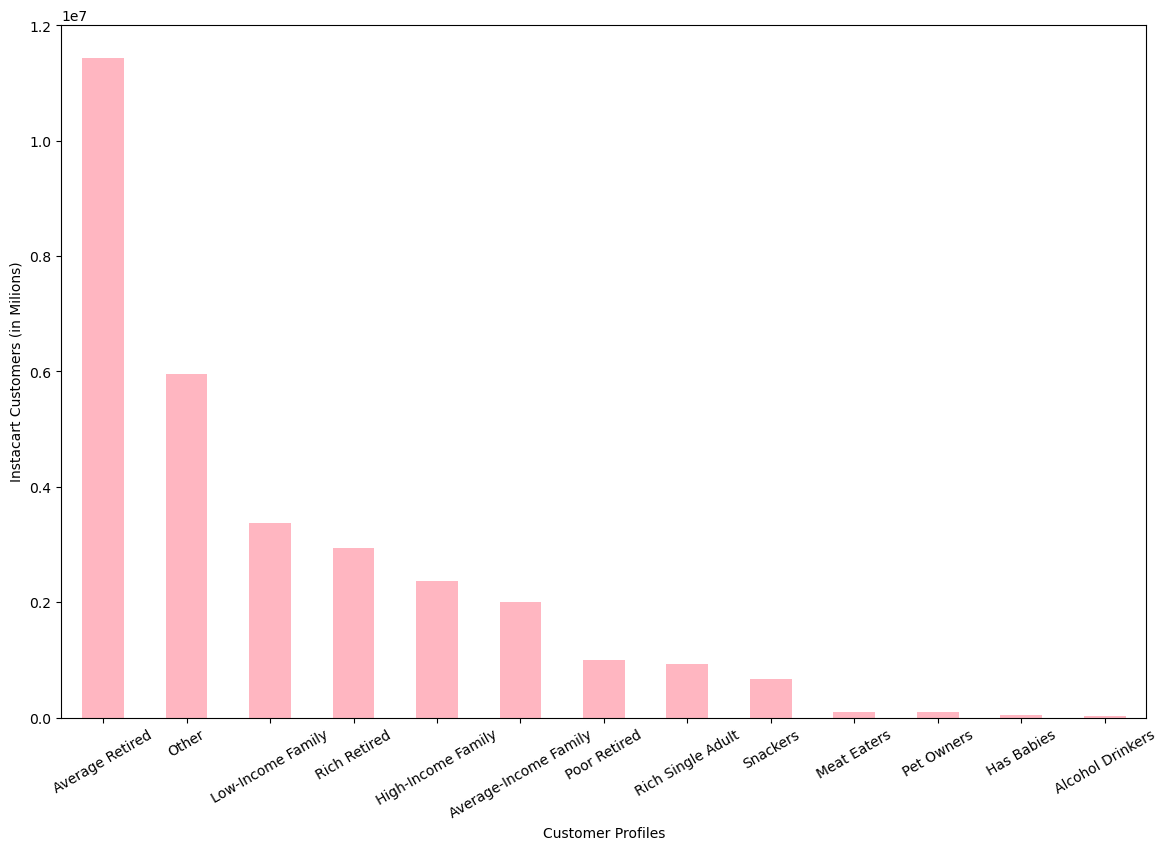

In [68]:
# Creating a barchart with the new profiles
bar_new_profile = df_high_act_cust['profile'].value_counts().plot.bar(rot=30, figsize = (14,9), color = 'lightpink')
plt.ylabel ('Instacart Customers (in Milions)')
plt.xlabel ('Customer Profiles')

In [69]:
# Export the bar chart
bar_new_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart_03.16.png'))

Pet Owner Customers

In [70]:
# Creating pet_owner column

df_high_act_cust.loc[df_high_act_cust['department'] == 'pets', 'pet_owner'] = 'Yes'
df_high_act_cust.loc[df_high_act_cust['department'] != 'pets', 'pet_owner'] = 'No'

In [71]:
df_high_act_cust['pet_owner'].value_counts(dropna= False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

Vegetarians

In [72]:
# Create list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, then we assume them a vegetarian.
define_veg = []
for value in df_high_act_cust['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        define_veg.append('Yes')
    else:
        define_veg.append('No')

In [73]:
# Check the result
define_veg

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [74]:
# Assigning 'define_veg' list values to 'vegetarian' column
df_high_act_cust['vegetarian'] = define_veg

In [75]:
df_high_act_cust.shape

(30964564, 44)

In [76]:
df_high_act_cust['vegetarian'].value_counts(dropna = False)

Yes    29285949
No      1678615
Name: vegetarian, dtype: int64

Text(0.5, 1.0, 'Vegetarian & Non-Vegetarian Customers')

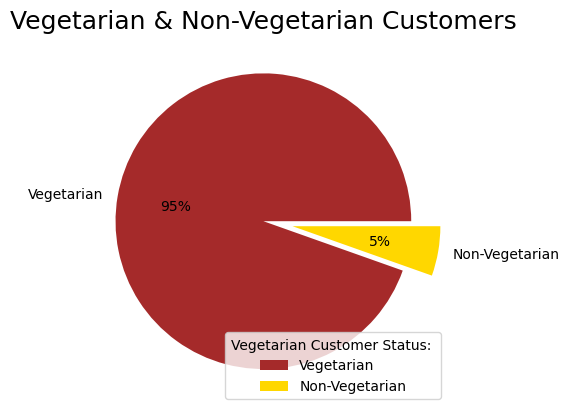

In [77]:
# Drawing a pie chart of Vegetarians
veg_pie = df_high_act_cust['vegetarian'].value_counts().plot.pie(labels = ['Vegetarian','Non-Vegetarian'], autopct=('%1.f%%'), colors = ['Brown','gold'], label = '', explode = [0,0.2])
veg_pie.legend(title = 'Vegetarian Customer Status: ', loc = 'lower right')
plt.title( "Vegetarian & Non-Vegetarian Customers", fontsize= '18')

In [78]:
# Export Vegetarian pie chart 
veg_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veg_pie_03.16.png'))

# Visualization of crosstab_age_day
bar_age_day = crosstab_age_hour.plot(kind = 'bar', rot = 0, color= ['gold', 'purple', 'blue'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Standard hours', 'Early bird', 'Night owl'])
plt.title('Frequency of hour purchased during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 18)

In [79]:
print(df_high_act_cust['busiest_of_days_for_chart'])

0                Night owl
1                Night owl
2           Stardard hours
3                Night owl
4           Stardard hours
                 ...      
32404850         Night owl
32404851         Night owl
32404852    Stardard hours
32404853    Stardard hours
32404854        Early bird
Name: busiest_of_days_for_chart, Length: 30964564, dtype: object


Text(0.5, 0, 'Time of Order Habits')

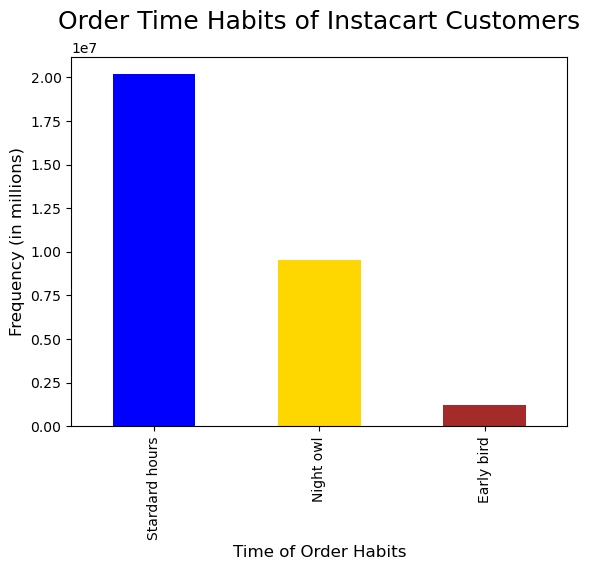

In [80]:
# Draw a bar chart of 'order_time_habit' column

time_habit_bar = df_high_act_cust['busiest_of_days_for_chart'].value_counts().plot.bar( color = ['blue', 'gold', 'brown'])
plt.title('Order Time Habits of Instacart Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Time of Order Habits',  fontsize = 12)

In [81]:
# Export the bar chart
time_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_order_habits_barchart.03.16.png'))

## Aggregate the Max, Min & Mean Values

In [82]:
# Comparing the Max, Min & Mean Values
df_high_act_cust.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                days_since_prior_order           
                         max  min      mean                   mean  min   max
profile                                                                      
Alcohol Drinkers        15.0  1.0  8.032672              10.356580  0.0  30.0
Average Retired         25.0  1.0  7.955579              10.755851  0.0  30.0
Average-Income Family   25.0  1.0  7.946659              10.739723  0.0  30.0
Has Babies              15.0  1.0  7.633590              10.131648  0.0  30.0
High-Income Family      25.0  1.0  7.954102              10.810976  0.0  30.0
Low-Income Family       25.0  1.0  7.381677              10.927941  0.0  30.0
Meat Eaters             15.0  1.0  7.959153              11.404019  0.0  30.0
Other                   25.0  1.0  8.052998              10.880050  0.0  30.0
Pet Owners              15.0  1.0  7.887489              11.593531  0.0  30.0
Poor Retired            25.0  1.0  6.704679              11.096586  0.0  30.0
Rich Retired            25.0  1.0  7.958458              10.718950  0.0  30.0
Rich Single Adult       25.0  1.0  7.932458              10.675896  0.0  30.0
Snackers                 7.0  1.6  4.265089              10.781580  0.0  30.0

## Compare And identify customer profiles with regions and departments

In [83]:
# Comparing customer profiles & regions
crosstab_profile_region = pd.crosstab(df_high_act_cust['profile'], df_high_act_cust['region'], dropna = False)

In [84]:
crosstab_profile_region

region,Midwest,Northeast,South,West
profile,,,,
Alcohol Drinkers,7491,5706,10691,7919
Average Retired,2678831,2001315,3833308,2930250
Average-Income Family,461452,360607,662387,527300
Has Babies,11877,8422,14914,11938
High-Income Family,569004,427743,771098,601135
Low-Income Family,789769,588581,1125831,874211
Meat Eaters,22422,16932,31331,22699
Other,1408054,1059765,1993645,1500302
Pet Owners,21358,17734,29909,24059


In [85]:
# Comparing customer profiles & departments
crosstab_profile_dept = pd.crosstab(df_high_act_cust['profile'], df_high_act_cust['department_id'], dropna = False)

In [86]:
crosstab_profile_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Alcohol Drinkers,0,0,0,0,31807,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Average Retired,791721,12798,419265,3457991,50857,98563,898471,0,317424,12187,...,268486,671607,238970,387558,1954402,251694,166158,890557,373256,24194
Average-Income Family,139432,2125,73254,609739,8147,17146,156010,0,56657,2221,...,48290,119920,40325,69119,341188,44574,27480,159736,65629,4261
Has Babies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47151,0,0,0
High-Income Family,165423,2768,90778,702406,12620,20440,188021,0,66239,2236,...,57035,141109,49432,82370,403200,54345,33065,182363,77655,4878
Low-Income Family,227591,3618,117232,939268,15680,25286,315883,0,80635,4317,...,59368,183416,80474,99411,539597,79627,38446,405251,109324,7062
Meat Eaters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other,462664,7694,244788,1964571,0,56164,586406,0,176097,7323,...,139713,388979,153273,217528,1130293,153788,36502,0,221764,14219
Pet Owners,0,0,0,0,0,0,0,93060,0,0,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x7f90395de760>,
 [Text(0, 0, 'Snackers'),
  Text(1, 0, 'Rich Single Adult'),
  Text(2, 0, 'High-Income Family'),
  Text(3, 0, 'Average-Income Family'),
  Text(4, 0, 'Low-Income Family'),
  Text(5, 0, 'Rich Retired'),
  Text(6, 0, 'Average Retired'),
  Text(7, 0, 'Poor Retired'),
  Text(8, 0, 'Has Babies'),
  Text(9, 0, 'Meat Eaters'),
  Text(10, 0, 'other')])

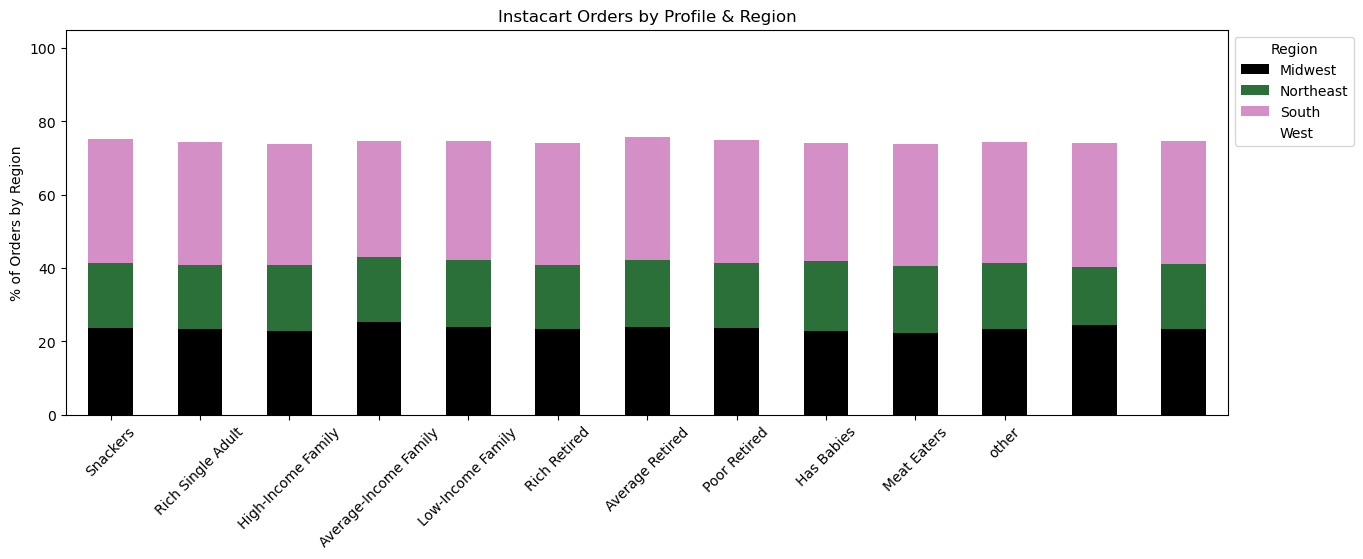

In [87]:
# Creating a stacked barchart of customer profile by region
bar_region_prof = crosstab_profile_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'cubehelix').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('% of Orders by Region')
plt.title ('Instacart Orders by Profile & Region')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['Snackers','Rich Single Adult','High-Income Family','Average-Income Family','Low-Income Family','Rich Retired','Average Retired','Poor Retired','Has Babies','Meat Eaters','other'])

Highest % of orders by region is in The South

Marketing team should focus on advertising to their clients in the Northeast

In [88]:
# Export the stackbar chart
bar_region_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.03.16.png'))

In [89]:
# Export update df.pkl format 
df_high_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_4.10_part2.pkl'))